1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('water.csv')

In [3]:
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

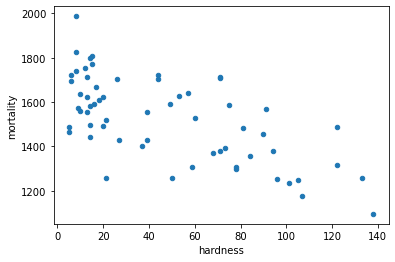

In [5]:
data.plot(kind='scatter', x='hardness', y='mortality')

Судя по графику, чем выше жесткость воды, тем ниже смертность населения.

In [6]:
data[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [31]:
data[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Кф корреляции подтверждает теорию об обратной зависимости показателей жесткости и смертности,
Зависимость по пирсону и по спирману примерно сопоставима. Достаточно высокая, выше среднего.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
X = data[['hardness']]
y = data['mortality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [19]:
model.coef_

array([-3.13167087])

In [20]:
model.intercept_

1668.9722977277095

In [21]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [22]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

***y = -3,13x + 1668, r2 = 0,5*** <p>
модель построена, однако коэфициент детерминации показывает не самое лучшее качество модели...

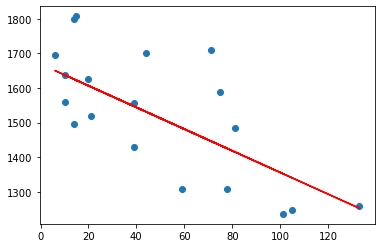

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [24]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [27]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           7.83e-06
Time:                        18:54:41   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [26]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const        239.367843
mortality     -0.126702
dtype: float64
R2:  0.3967890100912279


<h3>Вопрос к Олегу

Почему у нас при разных вариантах построения модели кф детерминации разные? Тут меньше...

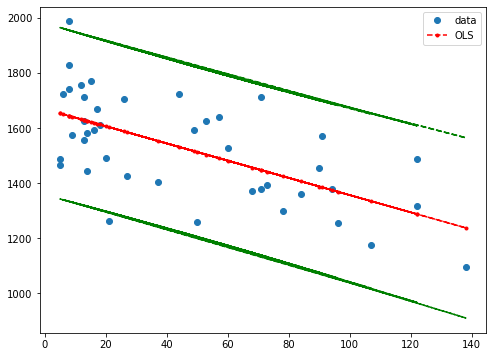

In [28]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

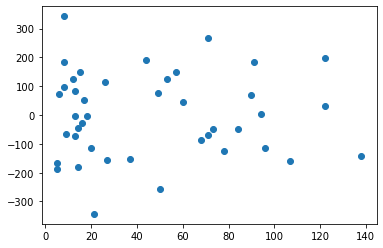

In [29]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

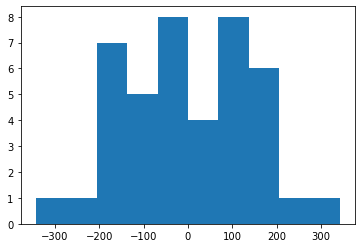

In [30]:
plt.hist(results.resid)

Остатки хаотичны, более менее нормальая модель, но могло быть и лучше.

<h3>Южные и северные регионы

In [31]:
data_south = data[data.location == 'South']
data_north = data[data.location == 'North']

In [42]:
data_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

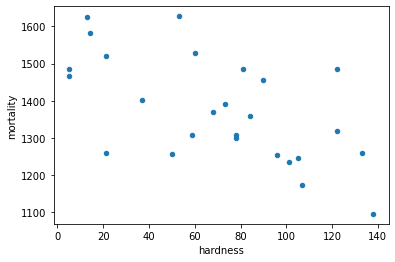

In [32]:
data_south.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

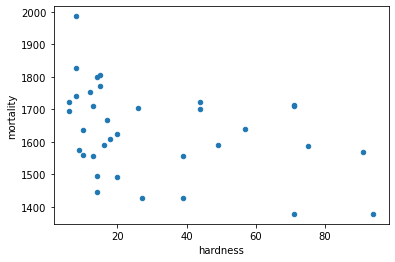

In [33]:
data_north.plot(kind='scatter', x='hardness', y='mortality')

В северных регионах смертность выше, чем в южных.  При этом жесткость воды низкая.
В южных регионах как в целом по выборке видим обратную зависимость между смертностью и жесткостью воды. 

In [45]:
data_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [47]:
data_south[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [48]:
# Кф корреляции по южному региону сопоставим со всей выборкой

In [49]:
data_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [51]:
data_north[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [53]:
# кф крреляции вюжных регионах показывает, что смертность от жесткости воды зависит слабо, возможно другие факторы влияют.
# И умирает там большее количество людей. Мерзнут, видимо.

In [38]:
X = data_south[['hardness']]
y = data_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [39]:
model.coef_

array([-3.51342921])

In [40]:
model.intercept_

1640.2204603423374

In [41]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-2.551922301235205

In [60]:
X_test.shape

(11, 1)

In [63]:
y_test.shape

(11,)

ValueError: x and y must have same first dimension, but have shapes (8, 1) and (19,)

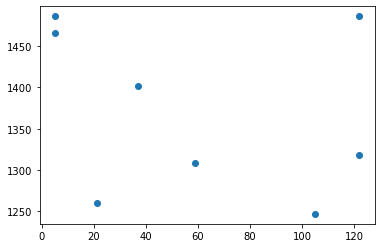

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           7.30e-05
Time:                        19:00:33   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

E:\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


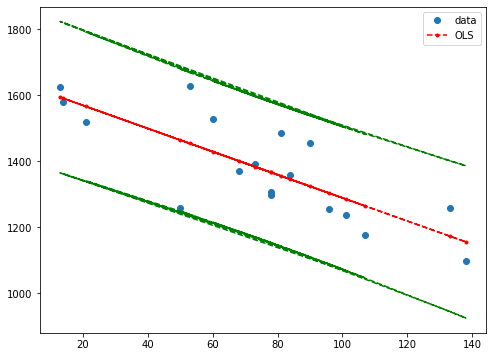

In [44]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

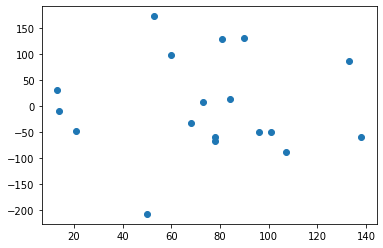

In [45]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 0., 4., 4., 3., 1., 1., 3., 1.]),
 array([-207.54899972, -169.49497096, -131.4409422 ,  -93.38691343,
         -55.33288467,  -17.2788559 ,   20.77517286,   58.82920162,
          96.88323039,  134.93725915,  172.99128791]),
 <BarContainer object of 10 artists>)

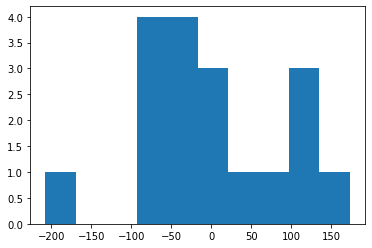

In [46]:
plt.hist(results.resid)

СЕВЕРНЫЕ РАЙОНЫ

In [66]:
X = data_north[['hardness']]
y = data_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [67]:
model.coef_

array([-1.97686226])

In [68]:
model.intercept_

1688.150229031281

In [53]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.018885304285745863

ValueError: x and y must have same first dimension, but have shapes (11, 1) and (19,)

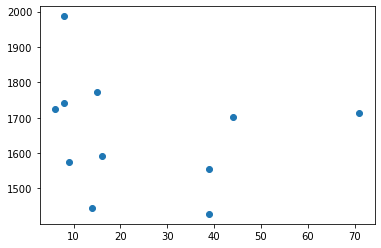

In [69]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

ОЧЕНЬ НИЗКИЙ КФ ДЕТЕРМИНАЦИИ, ЛЮДИ ТОЧНО ГИБНУТ НЕ ОТ ВОДЫ.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Mon, 07 Jun 2021   Prob (F-statistic):             0.0316
Time:                        19:02:00   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

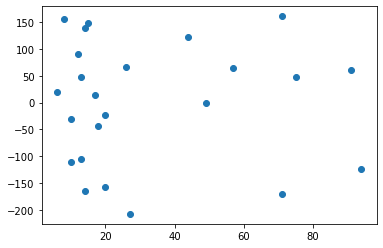

In [55]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 3., 3., 0., 3., 2., 3., 3., 2., 4.]),
 array([-207.77494801, -170.87675407, -133.97856012,  -97.08036618,
         -60.18217223,  -23.28397829,   13.61421566,   50.5124096 ,
          87.41060354,  124.30879749,  161.20699143]),
 <BarContainer object of 10 artists>)

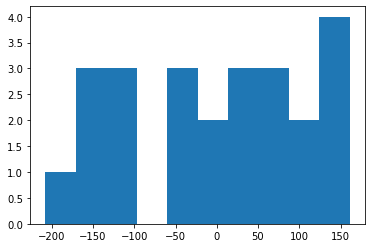

In [56]:
plt.hist(results.resid)